# Unveiling Insights into Movie Ratings: A Comprehensive Data Exploration

## Import packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [14]:
# The full u data set, 100000 ratings by 943 users on 1682 items.
u_data = pd.read_csv('u.data', sep='\t', names=columns_u_data)

# Information about the items (movies)
u_item = pd.read_csv('u.item', sep='|', names=columns_u_item, encoding='latin-1')

# Demographic information about the users
u_user = pd.read_csv('u.user', sep='|', names=columns_u_user)


In [21]:
# Display first few rows of the dataframe
u_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [22]:
# Display first few rows of the datafram
u_item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Display first few rows of the datafram
u_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Basic info about data

## Insights
**u_data** 
- contains 100,000 entries with no missing values, consisting of user_id, item_id, rating, and timestamp columns.

**Insights on u_item**
- u_item contains 1,682 entries with various movie details. There is one missing value in the release_date column and three missing values in IMDb_URL.
- The video_release_date column has no non-null values. It includes columns indicating movie genres like Action, Adventure, Comedy, etc.

**Insights on u_user**
- u_user contains 943 entries with user demographic information such as user_id, age, gender, occupation, and zip_code.
- Duplicate information was presented earlier. I'll avoid repetition in the code snippet to keep it concise.

In [15]:
u_data.info()
u_item.info()
u_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation        

## Descriptive statistics about data

In [23]:
# Gather descriptive statistics about the data
u_data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [24]:
u_item.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
u_user.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Insights from `u_data`:
- **user_id**:
  - Minimum user_id is 1, and the maximum is 943, indicating 943 unique users.
  - Users have given ratings to items ranging from 1 to 1682.
- **item_id**:
  - Items have received ratings ranging from 1 to 1682.
- **rating**:
  - Ratings range from 1 to 5, with a mean of approximately 3.53.
  - The majority of ratings fall between 3 and 4, as seen from the quartile values.
- **timestamp**:
  - Indicates the time when the ratings were recorded, represented in a numeric format.

### Insights from `u_item`:
- **movie_id**:
  - Ranges from 1 to 1682, likely representing unique movies in the dataset.
- **Genres** (like Action, Adventure, Comedy, etc.):
  - Categorical columns indicating the presence (1) or absence (0) of different genres in movies.
  - Each genre has a mean value around 0.01 to 0.30, showing the proportion of movies belonging to that genre.

### Insights from `u_user`:
- **user_id**:
  - Similar to `u_data`, there are 943 unique users.
- **age**:
  - The age of users ranges from 7 to 73, with a mean of approximately 34.
  - Most users fall between the ages of 25 and 43, based on quartile values.


### Validate for Missing Data

In [26]:
# Check for missing values
u_data.isna().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [27]:
# Check for missing values
u_item.isna().sum()

movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [28]:
# Check for missing values
u_user.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

### Insights from missing data

#### `u_data`:
- There are no missing values in the `u_data` dataset across any columns (`user_id`, `item_id`, `rating`, `timestamp`).

#### `u_item`:
- **release_date**: There is one missing value in the `release_date` column.
- **video_release_date**: All values are missing in the `video_release_date` column (1682 missing out of 1682 total entries).
- **IMDb_URL**: Three missing values are observed in the `IMDb_URL` column.
- Other columns such as `movie_id`, `unknown`, `Action`, `Adventure`, etc., do not contain any missing values.

#### `u_user`:
- There are no missing values in the `u_user` dataset across any columns (`user_id`, `age`, `gender`, `occupation`, `zip_code`).


# Rating Distribution 

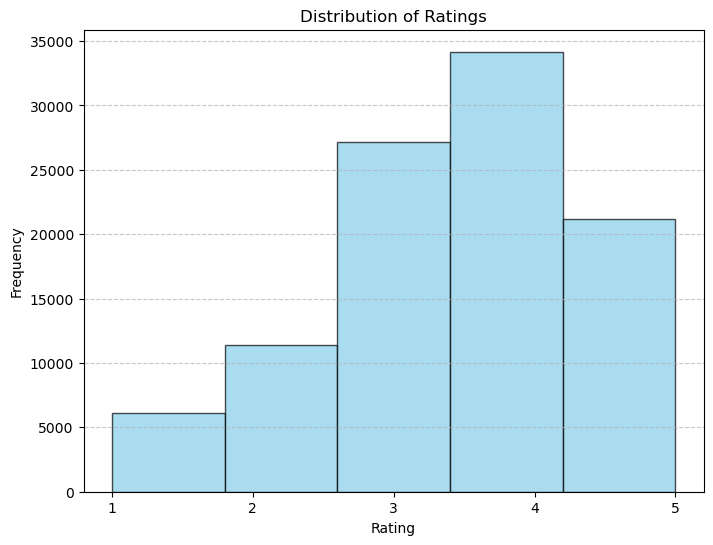

In [29]:
# Rating distribution
plt.figure(figsize=(8, 6))
plt.hist(u_data['rating'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**The ratings dataset shows a mean rating of approximately 3.53, with ratings ranging from 1 to 5. Most ratings lie between 3 and 4, indicating a generally positive trend in user ratings**

## Age Distribution of Users

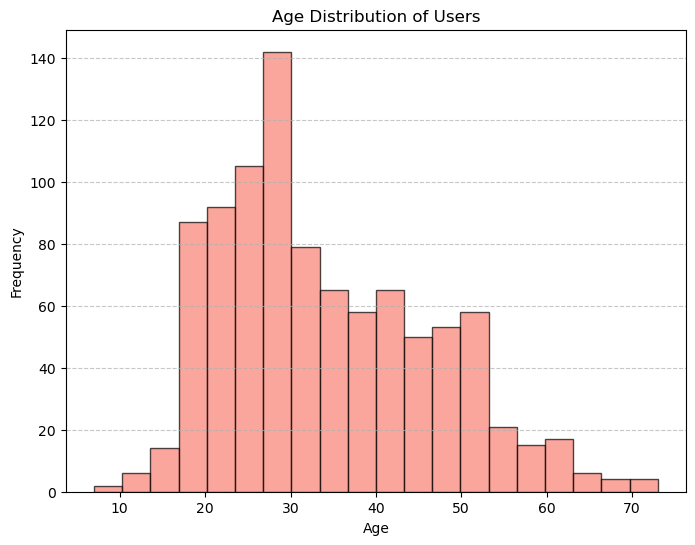

In [34]:
# Age distribution of users
plt.figure(figsize=(8, 6))
plt.hist(u_user['age'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**The user age ranges from 7 to 73, with a mean age of around 34 years. There's a relatively balanced distribution across different age groups.**

## Correlation Analysis

In [35]:
# Correlation analysis between user age and ratings
user_rating = pd.merge(u_user[['user_id', 'age']], u_data[['user_id', 'rating']], on='user_id')
correlation = user_rating.corr()

print(correlation)


          user_id       age    rating
user_id  1.000000 -0.073599 -0.009371
age     -0.073599  1.000000  0.054460
rating  -0.009371  0.054460  1.000000


Overall, these correlations are near zero, implying no significant linear dependency between user ID, age, and ratings given to movies. Non-linear or unobserved factors might influence user ratings.

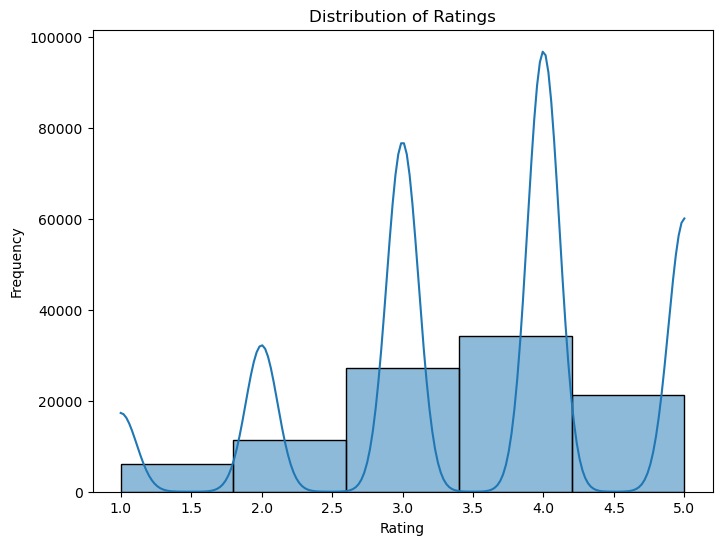

In [39]:
# Rating distribution histogram
plt.figure(figsize=(8, 6))
sns.histplot(u_data['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

"The graph indicates a substantial concentration of movie ratings falling within the range of 3.5 to 4.1."

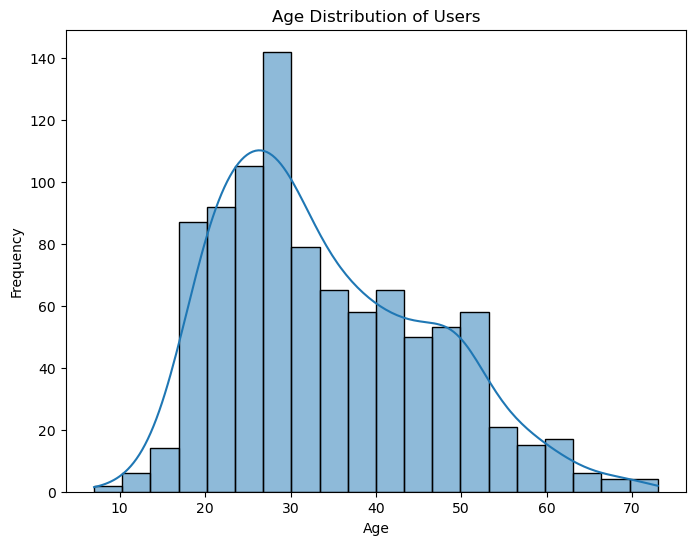

In [40]:
# Age distribution histogram
plt.figure(figsize=(8, 6))
sns.histplot(u_user['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

"The graph illustrates a significant proportion of users who provided ratings are within the age range of 25 to 35 years."

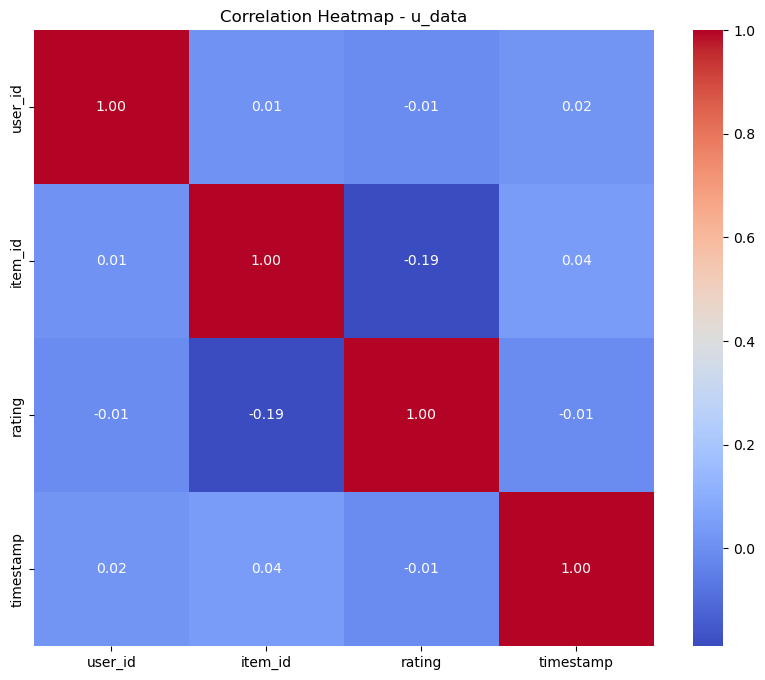

In [42]:
 #Step 3: Correlation Analysis

# Correlation matrix for u_data
u_data_corr = u_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(u_data_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - u_data')
plt.show()

"The calculated correlation values indicate a low level of correlation among the attributes, suggesting weak relationships between them."

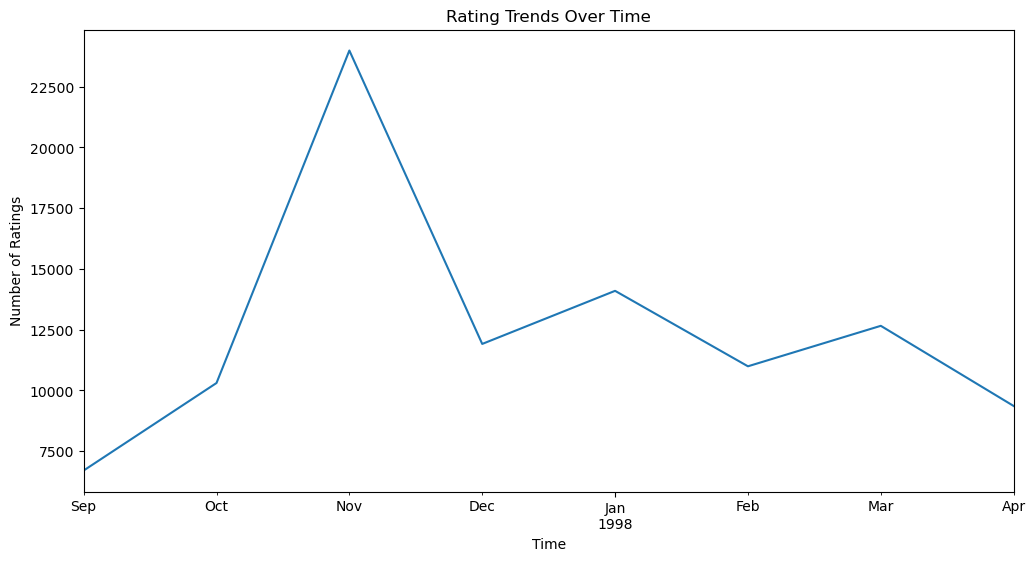

In [43]:
# Step 4: Time-Series Analysis

# Convert timestamp to datetime in u_data
u_data['timestamp'] = pd.to_datetime(u_data['timestamp'], unit='s')

# Rating trends over time
plt.figure(figsize=(12, 6))
u_data.set_index('timestamp')['rating'].resample('M').count().plot()
plt.title('Rating Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()

"The graph depicts a notable surge in the number of ratings recorded from October to December, primarily during the festive season encompassing Christmas and Halloween."

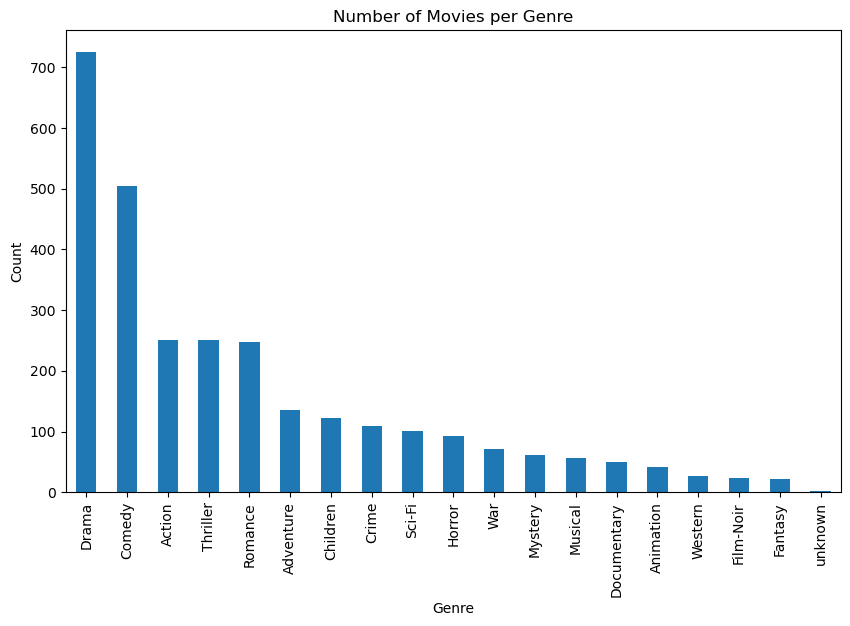

In [44]:
# Step 5: Genre-based Analysis

# Count of movies in each genre
genre_counts = u_item.iloc[:, 5:].sum().sort_values(ascending=False)

# Bar plot for genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

"The graph displaying the number of movies per genre illustrates that Drama has the highest count, closely followed by Comedy, whereas Fantasy ranks comparatively lower in count among the genres."

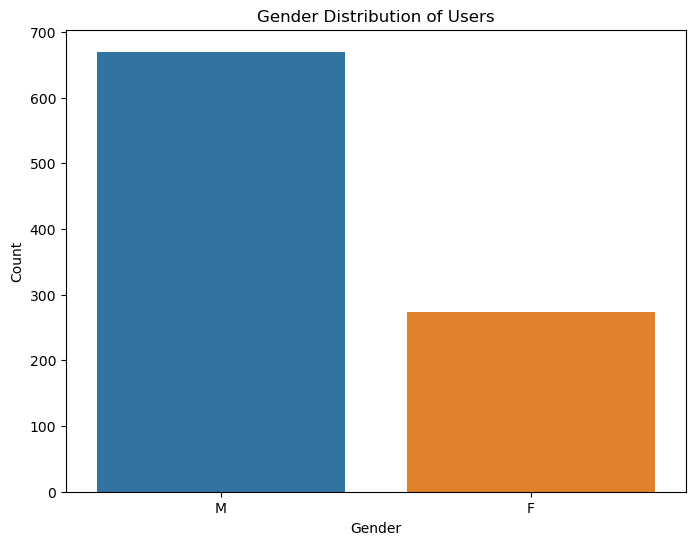

In [45]:
# Step 6: Demographic Analysis

# Gender distribution among users
gender_counts = u_user['gender'].value_counts()

# Bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

"The gender distribution graph indicates a notably higher count of male respondents compared to females, hinting at potential gender bias within the dataset."

In [46]:

# Occupation distribution among users
occupation_counts = u_user['occupation'].value_counts()


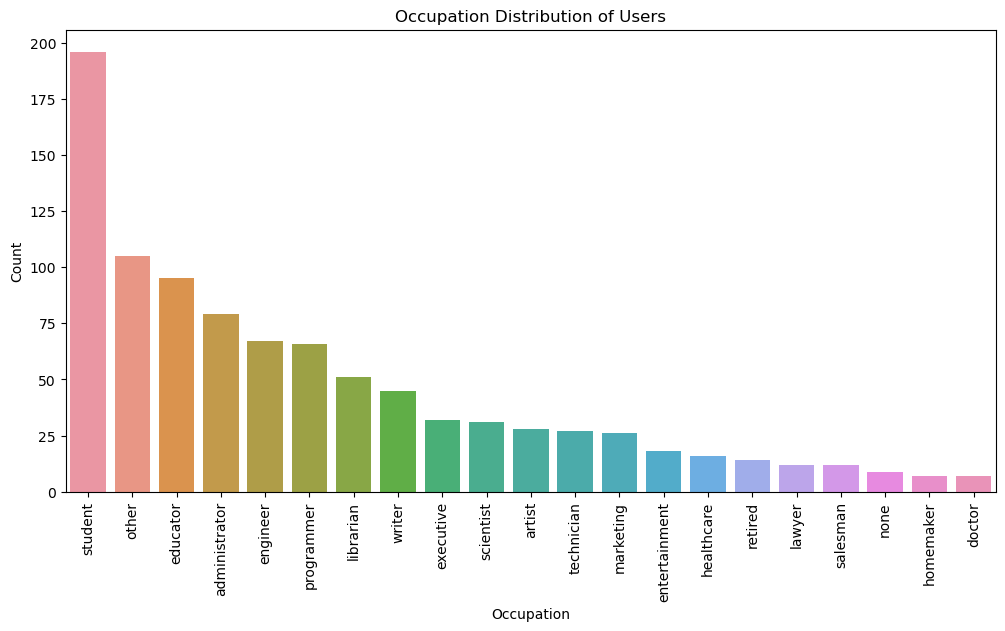

In [47]:
# Bar plot for occupation distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Occupation Distribution of Users')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

"The analysis of respondent occupations for movie ratings reveals that the majority are students, followed by educators, while doctors are comparatively fewer in count among the occupations."

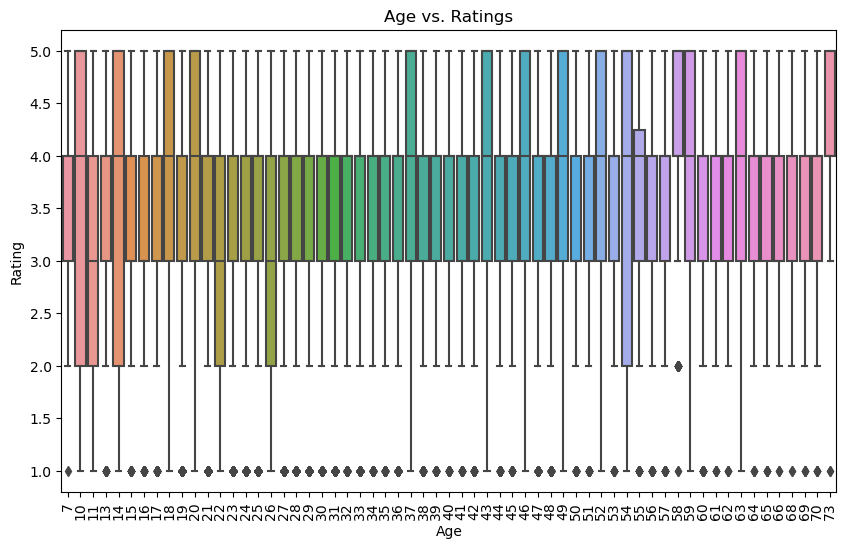

In [56]:
# 2. User Demographics & Ratings

# Merge u_data with u_user to include user demographics
merged_user_data = pd.merge(merged_data, u_user[['user_id', 'age', 'gender', 'occupation']],
                            on='user_id', how='inner')

# Age vs. Ratings analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='rating', data=merged_user_data)
plt.title('Age vs. Ratings')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

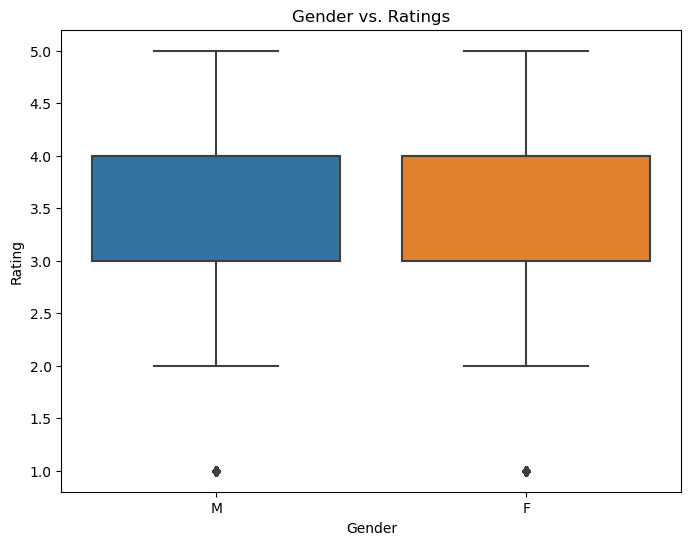

In [51]:
# Gender vs. Ratings analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='rating', data=merged_user_data)
plt.title('Gender vs. Ratings')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

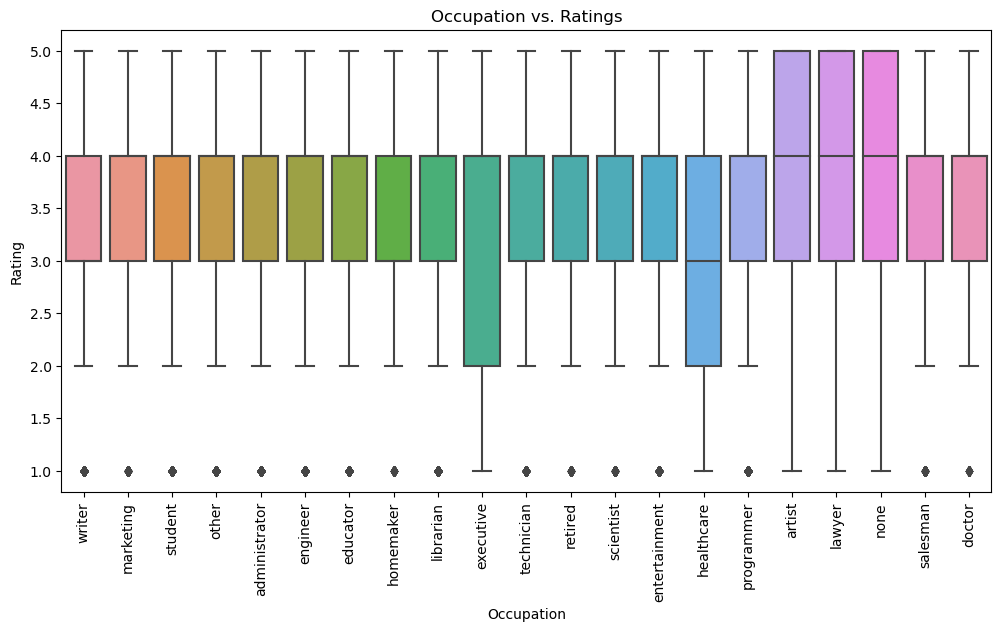

In [52]:
# Occupation vs. Ratings analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='occupation', y='rating', data=merged_user_data)
plt.title('Occupation vs. Ratings')
plt.xlabel('Occupation')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


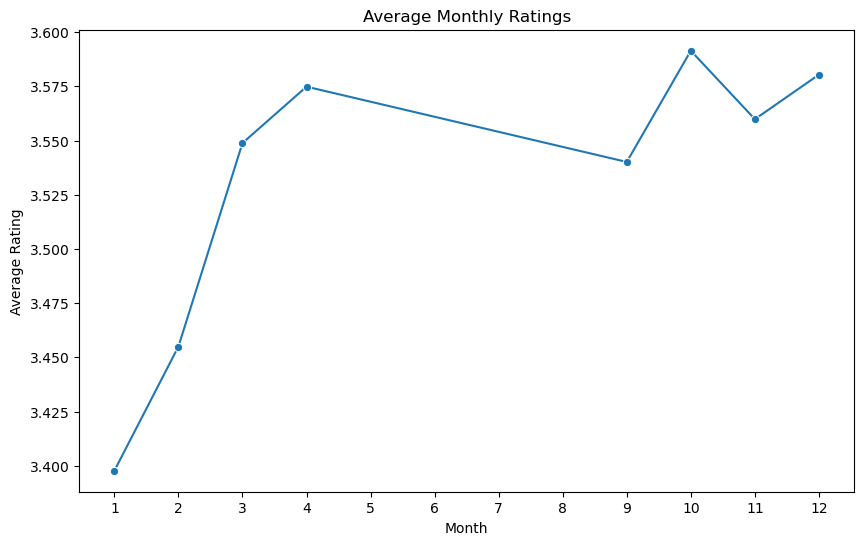

In [53]:
# 3. Time-Based Analysis

# Extract month from timestamp
u_data['month'] = u_data['timestamp'].dt.month

# Average monthly ratings analysis
monthly_avg_ratings = u_data.groupby('month').agg({'rating': 'mean'}).reset_index()

# Line plot for average monthly ratings
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='rating', data=monthly_avg_ratings, marker='o')
plt.title('Average Monthly Ratings')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13))
plt.show()

"The graph depicting average monthly ratings exhibits a relatively normal distribution from March to the 9th month, followed by a sudden increase from the 9th to the 10th month, and then returns to a normal pattern thereafter."